In [2]:
pip install seaborn 


Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
df=sns.load_dataset('titanic')
# load_dataset()always expects only inbuilt example datsets if u give any other 
# it shows as value error

In [5]:
df.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [6]:
df.head(7).isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
# To remove missing values
# delete entire row or data points .....but the problem is u ll lose lots of data

In [8]:
df.shape #which means that we have 891 rows and 15 columns

(891, 15)

In [9]:
# dropna removes the NaN or None values from the dataset and shape returns the
#  values after removing the  None values
df.dropna().shape

(182, 15)

In [17]:
# U cant usually go with this because u ll loose huge amount of data 

In [10]:
# Try column wise deletion
# Suppose here their are many NaN values in deck column So u can delete it
df.dropna(axis=1) #u can also give a parameter as inplace=True vch makes 
# the changes into the original dataset
# which are having null values get dropped

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [19]:
# Imputation Techniques
# Techniques to find missing values
#1- Mean value imputation


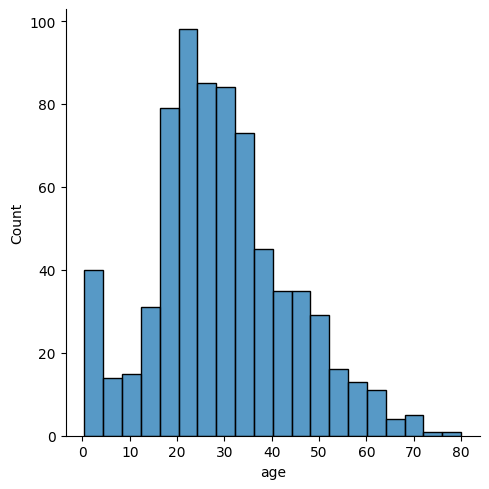

In [11]:
sns.displot(df["age"])#it is used to visualize the distribution of the single variable

<Axes: xlabel='age', ylabel='Count'>

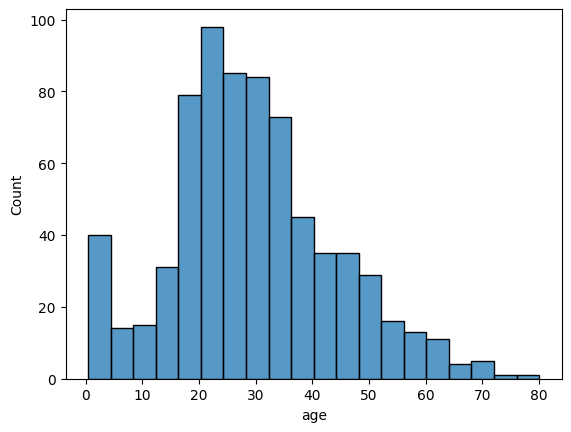

In [12]:
sns.histplot(df["age"])

<Axes: xlabel='age', ylabel='Count'>

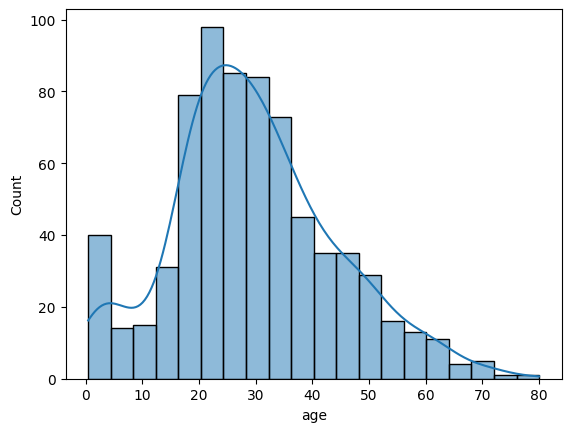

In [22]:
sns.histplot(df["age"],kde=True)

In [13]:
df.shape

(891, 15)

In [20]:
# One of the solution to handle the null values is by filling the,
#  mean values is that wen can fill it with mean
df['age_mean']=df['age'].fillna(df['age'].mean())

In [21]:
df[["age_mean",'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [22]:
# We can use mean imputation data when we have normal distributed data

2.Median Value Imputation-If we have outliers in dataset we can use it

In [24]:
df['age_median']=df['age'].fillna(df['age'].median())


In [25]:
df[['age_median','age_mean','age']]

,age_medium,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


3.Mode Imputation Technique ===We can use it for categorical values

In [28]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median,age_mean,age_medium
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [29]:
df['embarked'].unique()# Here the value which is null u shud replace by any other values availabel for it 

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df['embarked'].notna()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: embarked, Length: 891, dtype: bool

In [33]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [34]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [35]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [36]:
df['embarked_mode'].isnull().sum()

0

In [37]:
df['embarked'].isnull().sum()

2

 4.Random sample imputation === U can just take some random value from the list and 
 replace the NaN values with that
